In [194]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [14]:
from sklearn.preprocessing import normalize
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [15]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.special import boxcox1p 
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from scipy.special import boxcox1p 
from sklearn.preprocessing import StandardScaler


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [98]:
def hist(data, colname):
    fig, ax = plt.subplots()
    plt.hist(data[colname], 30)
    plt.xlabel(colname)
    fig.set_size_inches(12.5, 10.5)
    plt.show()

In [17]:
def RMSLE (y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [18]:
def normalized(data):
    x = data.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    norm = pd.DataFrame(x_scaled)
    norm.columns = data.columns
    return norm

In [30]:
def box_transform(data):    
    '''for c in ['year']:
        lbl = LabelEncoder()
        lbl.fit(list(data[c]))
        data[c] = lbl.transform(list(data[c]))'''
    #shape
    #print('Shape data: {}'.format(data.shape))

    #log transform skewed numeric features 
    numeric_features = data.dtypes[data.dtypes != "object"].index

    skewed_features = data[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
    #compute skewness
    #print ("\skew in numerical features: \n")
    skewness = pd.DataFrame({'Skew' :skewed_features})   


    skewness = skewness[abs(skewness) > 0.75]
    #print ("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

    skewed_features = skewness.index
    lam = 0.15
    for feat in skewed_features:
        data[feat] = boxcox1p(data[feat], lam)

    return pd.get_dummies(data)

In [20]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]

        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self

    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


In [222]:
def predicted(model, X, Y, folds=5):
    return cross_val_predict(model, X, Y, cv=folds)


In [21]:
def train_model(model, X, Y):
    
    model.fit(X, Y)
    print("Accuracy score: ", model.score(X, Y)) 
    return model, model.score(X, Y)          

In [22]:
def forest(n_estimators=20, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False):
    return RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_features=max_features, max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease, min_impurity_split=min_impurity_split, bootstrap=bootstrap, oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, verbose=verbose, warm_start=warm_start)

In [141]:
def gboost(loss='huber', learning_rate=0.05, n_estimators=3000,
                                   min_samples_split=10, min_samples_leaf=15,max_depth=5,
                                   random_state=5,max_features='sqrt'):
    return GradientBoostingRegressor(loss=loss, learning_rate=learning_rate, n_estimators=n_estimators,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,max_depth=max_depth,
                                   random_state=random_state,max_features=max_features)

In [24]:
def svr(kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1):
    return SVR(kernel=kernel,degree=degree,gamma=gamma,coef0=coef0,tol=tol,C=C,epsilon=epsilon,shrinking=shrinking,cache_size=cache_size,verbose=verbose,max_iter=max_iter)

In [311]:
def lasso(alpha=0.0005, random_state=1):
    return make_pipeline(RobustScaler(), Lasso(alpha=alpha, random_state=random_state))


In [13]:
def averaged(m1, m2):
    averaged_models = AveragingModels(models = (m1, m2))

In [13]:
spb_data = pd.read_csv("./datasets/initial/spb.csv")
spb_data = spb_data[spb_data['median_salaries_1000'] != 0]
spb_data['year'] = spb_data['year'].fillna(0)
spb_data = spb_data[spb_data['year'] != 0]
spb_data = spb_data[spb_data['year'] != 1]

spb_data = spb_data[spb_data['price_per_m'] <= 400]
spb_data = spb_data[spb_data['price_per_m'] >= 20]


In [14]:
spb_data['year'] = spb_data['year'].apply(int).apply(str)
#Label Encoding some categorical variables
#for information in their ordering set

cols = ['year']
#apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(spb_data[c].values))
    spb_data[c] = lbl.transform(list(spb_data[c].values))
#shape
print('Shape data: {}'.format(spb_data.shape))
#spb_data['Id'] = [i for i in range(spb_data.shape[0])]


Shape data: (4028, 49)


In [15]:
spb_data['year'].head()

0    102
1     94
2     89
3     91
5    196
Name: year, dtype: int64

In [247]:
def plot_clouds_pred(pred, Y):
    #pred = np.expm1(model.predict(X)) * np.linalg.norm(spb_data['price_per_m'])
    #pred = np.expm1(model.predict(X))
    #pred = (model.predict(X))
    ensemble = pred * 1
    submit = pd.DataFrame()
    submit['price_per_m'] = ensemble

    mape = np.mean(np.abs((Y - submit['price_per_m']) / Y)) * 100 
    mpe = np.mean(((Y - submit['price_per_m']) / Y)) * 100 
    rmsle = RMSLE(Y, submit['price_per_m']) 
    r2 = r2_score(Y, submit['price_per_m'])
    y1 = (np.array(Y))
    y2 = np.array(submit['price_per_m'])
    x = np.arange(len(y1))
    print('rmsle: ',rmsle)
    print('r2: ',r2)
    m = np.argsort(y1)

    y1 = y1[m]
    y2 = y2[m]

    plt.scatter(x, y2)
    plt.scatter(x, y1)
    return mape
    

In [317]:
def plot_clouds(model, X, Y):
    #pred = np.expm1(model.predict(X)) * np.linalg.norm(spb_data['price_per_m'])
    #pred = np.expm1(model.predict(X))
    pred = (model.predict(X))
    ensemble = pred * 1
    submit = pd.DataFrame()
    submit['price_per_m'] = ensemble

    mape = np.mean(np.abs((Y - submit['price_per_m']) / Y)) * 100 
    mpe = np.mean(((Y - submit['price_per_m']) / Y)) * 100 
    rmsle = RMSLE(Y, submit['price_per_m']) 
    r2 = r2_score(Y, submit['price_per_m'])
    y1 = (np.array(Y))
    y2 = np.array(submit['price_per_m'])
    x = np.arange(len(y1))
    print('rmsle: ',rmsle)
    print('r2: ',r2)
    m = np.argsort(y1)

    y1 = y1[m]
    y2 = y2[m]

    plt.scatter(x, y2)
    plt.scatter(x, y1)
    return {'mape': mape, 'r2': r2, 'rmsle': rmsle}
    

In [314]:
def lasso(a=0.0001):
    return make_pipeline(RobustScaler(), Lasso(alpha=a, random_state=42))


In [93]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [179]:
houses = (pd.read_csv(f'./datasets/house/spb.csv'))

houses = houses[houses['price_per_m'] <= 300]
houses = houses[houses['price_per_m'] >= 20]

In [304]:
houses = (pd.read_csv(f'./datasets/house/smr.csv'))
houses = houses[houses['median_salaries_500'] != 0]
#houses = houses[houses['median_salaries_1000'] < 80]
houses = houses[houses['mean_salaries_1000'] < 60]
houses = houses[houses['distance_to_subway_station'] < 6000]
houses = houses[houses['price_per_m'] <= 120]
houses = houses[houses['price_per_m'] >= 20]

In [ ]:
[c for c in houses.columns]

In [305]:
X = (houses[[c for c in houses.columns if c not in ['price_per_m']]])
#X['year'] = spb_data['year']
#X = (spb_data[['year', 'distance_to_center', 'distance_to_bus_stop', 'distance_to_subway', 'vacancy_1000', 'mean_salaries_1000', 'point_of_interest_1000']])
#Y = normalize((np.log1p(spb_data['price_per_m']))[:,np.newaxis], axis=0).ravel()
Y = (houses['price_per_m'])
#Y = (Y-Y.min())/(Y.max()-Y.min())
#X_train, X_test, Y_train, Y_test = train_test_split(normalized(box_transform(X)), Y, test_size = 0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split((X), Y, test_size = 0.1, random_state=42)

#X_train = box_transform((X_train))
#X_test = box_transform((X_test))Ъ
#Y_train = (np.log1p(Y_train))
#Y_test = (np.log1p(Y_test))

Accuracy score:  0.8597026796260998
rmsle:  10.722771661551631
r2:  0.49859212066297753


{'mape': 24.187269305763564,
 'r2': 0.49859212066297753,
 'rmsle': 10.722771661551631}

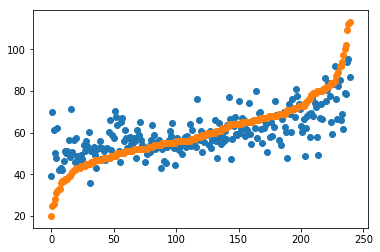

In [306]:
model = AveragingModels(models=(forest(100, criterion='mae'), gboost('lad', max_depth=7)))
trained_model = train_model(model, X_train, Y_train)
plot_clouds(trained_model[0], X_test, Y_test)

rmsle:  4.965157607064475
r2:  0.8830920780923557
mape:  {'mape': 25.47949212288077, 'r2': 0.8830920780923557, 'rmsle': 4.965157607064475}


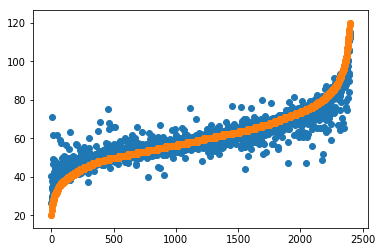

In [282]:
print("mape: ", plot_clouds(trained_model[0], X, Y))

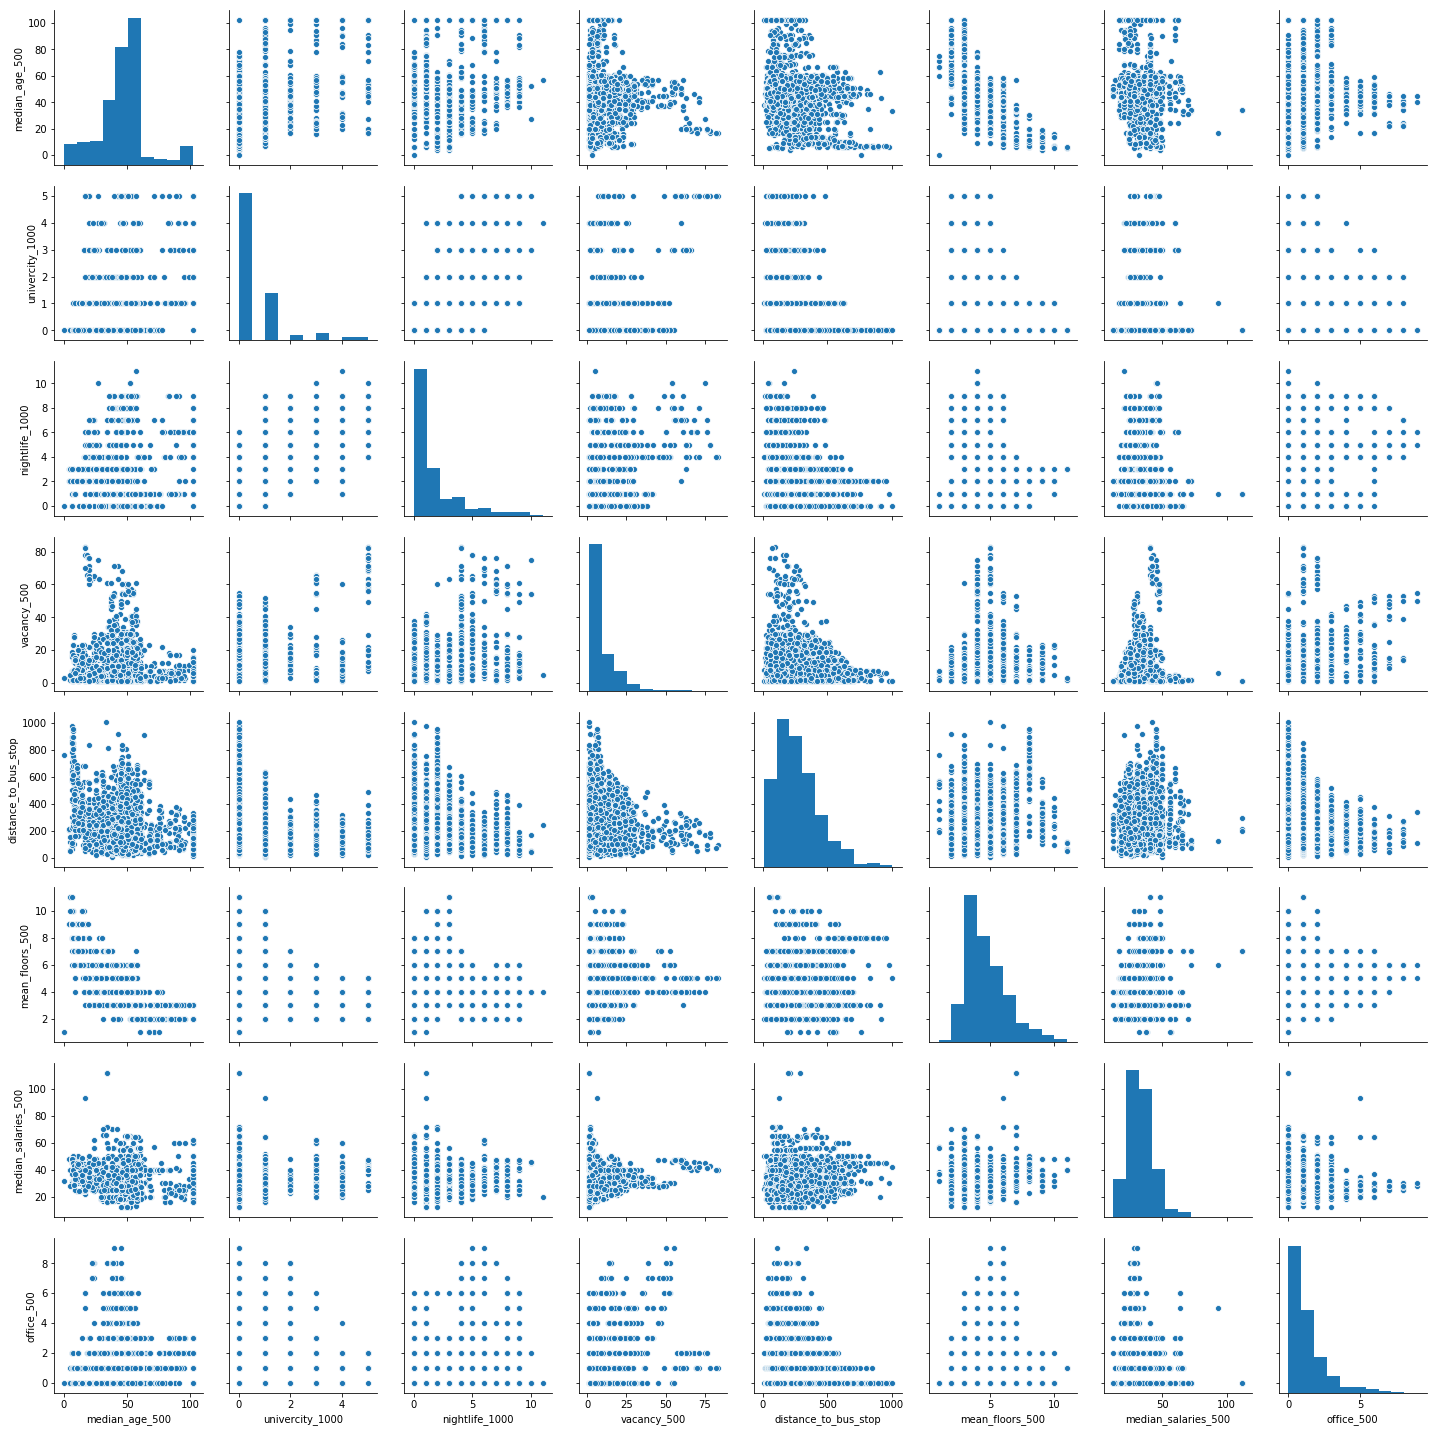

In [308]:
sns.pairplot(houses[cols])

In [316]:
lasso_results = res

In [350]:
mse = forest_results['mse']
mae = forest_results['mae']
maelog2 = forest_results['mae-log2']

In [379]:
huber = gboost_results['huber']
lad = gboost_results['lad']

In [383]:
huber.keys()

dict_keys([4, 5, 6, 7, 8])

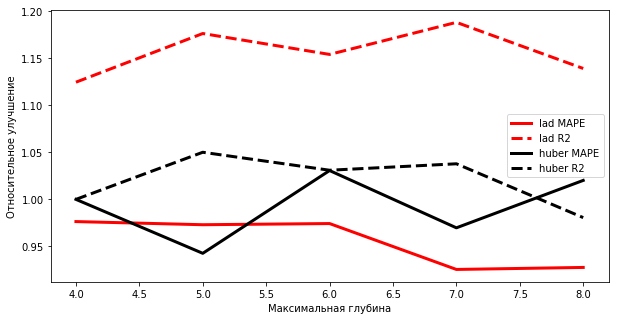

In [384]:
fig, ax = plt.subplots()

plt.plot(huber.keys(), [lad[k]['mape'] / huber[4]['mape'] for k in huber.keys()], color='red', lw=3, label='lad MAPE')
plt.plot(huber.keys(), [lad[k]['r2'] / huber[4]['r2'] for k in huber.keys()], '--', color='red', lw=3, label='lad R2')
#plt.plot(huber.keys(), [lad[k + 10]['rmsle'] / huber[120]['rmsle'] for k in huber.keys()], '-.', color='red', lw=3)

plt.plot(huber.keys(), [huber[k]['mape'] / huber[4]['mape'] for k in huber.keys()], color='black', lw=3, label='huber MAPE')
plt.plot(huber.keys(), [huber[k]['r2'] / huber[4]['r2'] for k in huber.keys()], '--', color='black', lw=3, label='huber R2')
#plt.plot(huber.keys(), [huber[k]['rmsle'] / huber[120]['rmsle'] for k in huber.keys()], '-.', color='black', lw=3)

plt.xlabel('Максимальная глубина')
plt.ylabel('Относительное улучшение')
fig.set_size_inches(10, 5)
ax.legend()
plt.show()

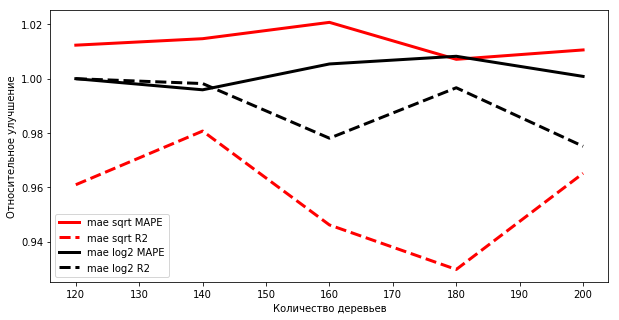

In [380]:
fig, ax = plt.subplots()

plt.plot(maelog2.keys(), [mae[k + 10]['mape'] / maelog2[120]['mape'] for k in maelog2.keys()], color='red', lw=3, label='mae sqrt MAPE')
plt.plot(maelog2.keys(), [mae[k + 10]['r2'] / maelog2[120]['r2'] for k in maelog2.keys()], '--', color='red', lw=3, label='mae sqrt R2')
#plt.plot(maelog2.keys(), [mae[k + 10]['rmsle'] / maelog2[120]['rmsle'] for k in maelog2.keys()], '-.', color='red', lw=3)

plt.plot(maelog2.keys(), [maelog2[k]['mape'] / maelog2[120]['mape'] for k in maelog2.keys()], color='black', lw=3, label='mae log2 MAPE')
plt.plot(maelog2.keys(), [maelog2[k]['r2'] / maelog2[120]['r2'] for k in maelog2.keys()], '--', color='black', lw=3, label='mae log2 R2')
#plt.plot(maelog2.keys(), [maelog2[k]['rmsle'] / maelog2[120]['rmsle'] for k in maelog2.keys()], '-.', color='black', lw=3)

plt.xlabel('Количество деревьев')
plt.ylabel('Относительное улучшение')
fig.set_size_inches(10, 5)
ax.legend()
plt.show()

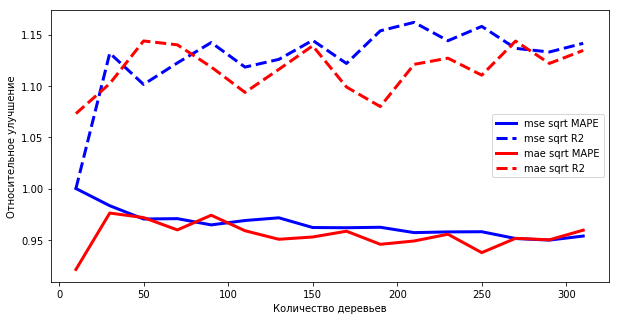

In [371]:
fig, ax = plt.subplots()
plt.plot(mse.keys(), [r['mape'] / mse[10]['mape'] for r in mse.values()], color='blue', lw=3, label='mse sqrt MAPE')
plt.plot(mse.keys(), [r['r2'] / mse[10]['r2'] for r in mse.values()], '--', color='blue', lw=3, label='mse sqrt R2')

plt.plot(mse.keys(), [r['mape'] / mse[10]['mape'] for r in mae.values()], color='red', lw=3, label='mae sqrt MAPE')
plt.plot(mse.keys(), [r['r2'] / mse[10]['r2'] for r in mae.values()], '--', color='red', lw=3, label='mae sqrt R2')

plt.xlabel('Количество деревьев')
plt.ylabel('Относительное улучшение')
fig.set_size_inches(10, 5)
ax.legend()

plt.show()



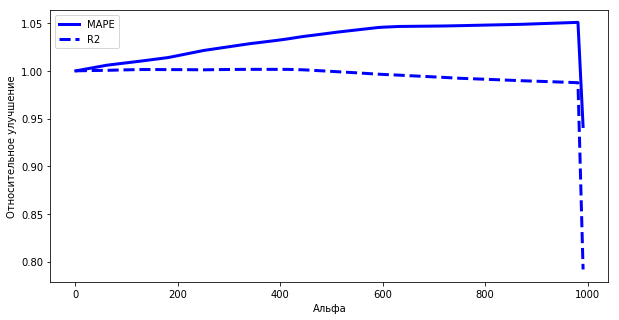

In [373]:
fig, ax = plt.subplots()
plt.plot(lasso_results.keys(), [r['mape'] / lasso_results[1]['mape'] for r in lasso_results.values()], color='blue', lw=3, label='MAPE')
plt.plot(lasso_results.keys(), [r['r2'] / lasso_results[1]['r2'] for r in lasso_results.values()], '--', color='blue', lw=3, label='R2')
plt.xlabel('Альфа')
plt.ylabel('Относительное улучшение')
fig.set_size_inches(10, 5)
ax.legend()

plt.show()

In [315]:
res = {}
for n in range(1, 1000, 10):
    trained_model = train_model(lasso(0.0001 * n), X_train, Y_train)
    res[n] = plot_clouds(trained_model[0], X_test, Y_test)

Accuracy score:  0.4123055657090573
rmsle:  11.038101914167205
r2:  0.4686681649642286
Accuracy score:  0.4123025943955586
rmsle:  11.037528721485108
r2:  0.46872334612026634
Accuracy score:  0.4122946821192853
rmsle:  11.037026344272212
r2:  0.46877170752748587
Accuracy score:  0.41228183011278774
rmsle:  11.036577461346644
r2:  0.46881491743810566
Accuracy score:  0.4122640396250521
rmsle:  11.036181926265156
r2:  0.46885299057640784
Accuracy score:  0.41224132205896646
rmsle:  11.03584661432637
r2:  0.4688852657290099
Accuracy score:  0.4122137244573217
rmsle:  11.035550413645394
r2:  0.468913775446531
Accuracy score:  0.4121845860149101
rmsle:  11.034852504425217
r2:  0.46898094713052096
Accuracy score:  0.41215155664237446
rmsle:  11.034131515260547
r2:  0.4690503357291783
Accuracy score:  0.4121141855987587
rmsle:  11.033469791419892
r2:  0.4691140165934943
Accuracy score:  0.41207246428967503
rmsle:  11.03285954847451
r2:  0.4691727398189516
Accuracy score:  0.41202639522961193


Accuracy score:  0.40435738595432225
rmsle:  11.095435951183001
r2:  0.46313414911084605
Accuracy score:  0.4042802585196481
rmsle:  11.096367400050653
r2:  0.463044006807119
Accuracy score:  0.40421166767488825
rmsle:  11.097356928408074
r2:  0.4629482354877589
Accuracy score:  0.40414248167216316
rmsle:  11.098354409762997
r2:  0.4628516857956594
Accuracy score:  0.40407257939498353
rmsle:  11.099362960696608
r2:  0.4627540558175819


In [318]:
trained_model = train_model(lasso(0.001 * n), X_train, Y_train)


Accuracy score:  0.36624986720211655


rmsle:  11.515587630591106
r2:  0.3711456455523572


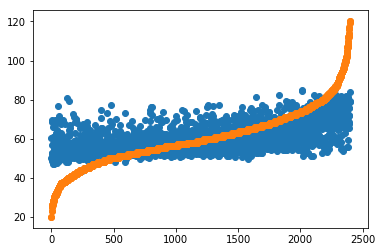

In [320]:
res[n] = plot_clouds(trained_model[0], X, Y)

In [294]:
gboost_results

{'huber': {4: {'mape': 28.2878825232756,
   'r2': 0.4014296760507351,
   'rmsle': 11.715722367526471},
  5: {'mape': 26.667596865600963,
   'r2': 0.42151237065450586,
   'rmsle': 11.517507900671362},
  6: {'mape': 29.153960415642132,
   'r2': 0.4138504409866097,
   'rmsle': 11.593530316566776},
  7: {'mape': 27.433344198199688,
   'r2': 0.41659756113811486,
   'rmsle': 11.56633058177503},
  8: {'mape': 28.85776478405615,
   'r2': 0.39366414647413017,
   'rmsle': 11.791474210010938}},
 'lad': {4: {'mape': 27.62101263150768,
   'r2': 0.45137948332671185,
   'rmsle': 11.216245412511709},
  5: {'mape': 27.52659000993078,
   'r2': 0.47212525258433335,
   'rmsle': 11.002133846004346},
  6: {'mape': 27.561631824656356,
   'r2': 0.4632121179735371,
   'rmsle': 11.094630228549942},
  7: {'mape': 26.18326991167924,
   'r2': 0.4768831149035938,
   'rmsle': 10.952439173059421},
  8: {'mape': 26.243706105329913,
   'r2': 0.4572235248127178,
   'rmsle': 11.156346359897267}}}

In [ ]:
model = AveragingModels(models=(forest(100, criterion='mae'), gboost('lad', max_depth=7)))
trained_model = train_model(model, X_train, Y_train)
res[n] = plot_clouds(trained_model[0], X_test, Y_test)

In [295]:
model = AveragingModels(models=(forest(100, criterion='mae'), gboost('lad', max_depth=7)))
pred = predicted(model,X, Y)


rmsle:  11.145631386141467
r2:  0.4109024522069845


23.915376455375092

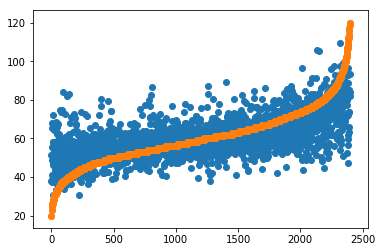

In [297]:
plot_clouds_pred(pred, Y)


In [227]:
cols = ['median_age_500','univercity_1000','nightlife_1000', 'vacancy_500', 'distance_to_bus_stop', 'mean_floors_500', 'median_salaries_500', 'office_500']

Accuracy score:  0.9200573770243603
rmsle:  10.296101271908771
r2:  0.4337682752458154
mape:  19.489727631194164


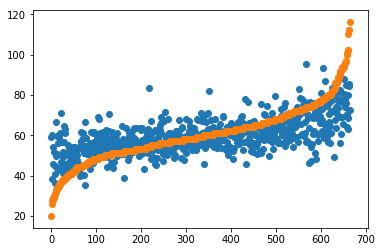

rmsle:  10.876488480887312
r2:  0.36813253279805913
mape:  19.564814796785107


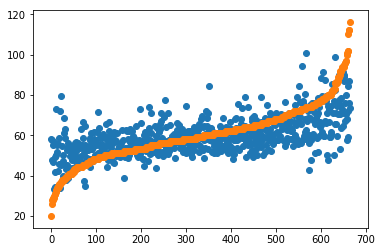

In [215]:
print("mape: ", plot_clouds(trained_model[0], X_test[cols], (Y_test)))

/home/disa/.local/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Accuracy score:  0.876671924746429
0.2313981250695288
mape:  25.087570687491382


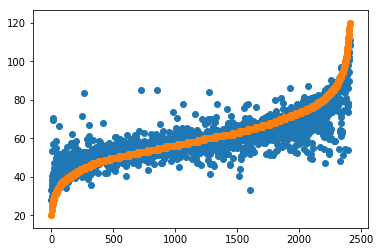

In [170]:
houses = (pd.read_csv(f'./datasets/house/smr.csv'))
houses = houses[houses['median_salaries_500'] != 0]
#houses = houses[houses['median_salaries_1000'] < 80]
houses = houses[houses['price_per_m'] <= 120]
houses = houses[houses['price_per_m'] >= 20]

X = (houses[[c for c in houses.columns if c not in ['price_per_m']]])
#X['year'] = spb_data['year']
#X = (spb_data[['year', 'distance_to_center', 'distance_to_bus_stop', 'distance_to_subway', 'vacancy_1000', 'mean_salaries_1000', 'point_of_interest_1000']])
#Y = normalize((np.log1p(spb_data['price_per_m']))[:,np.newaxis], axis=0).ravel()
Y = houses['price_per_m']
X_train, X_test, Y_train, Y_test = train_test_split(box_transform(X), Y, test_size = 0.2, random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split((X), Y, test_size = 0.1, random_state=42)

#X_train = box_transform((X_train))
#X_test = box_transform((X_test))Ъ
Y_train = (np.log1p(Y_train))
Y_test = (np.log1p(Y_test))

cols = ['median_age_500','univercity_1000','nightlife_1000', 'vacancy_500', 'distance_to_bus_stop', 'mean_floors_500', 'median_salaries_500', 'office_500']
#model = make_pipeline(PolynomialFeatures(3), Ridge())
#model.fit(X_train[cols], Y_train)
#plot_clouds(model, X[cols], Y)

model = AveragingModels(models=(forest(100), gboost()))
trained_model = train_model(model, X_train[cols], Y_train)
print(trained_model[0].score(X_test[cols], Y_test))
print("mape: ", plot_clouds(trained_model[0], X[cols], Y))

Accuracy score:  0.35890650850610734
0.3405096556503683
rmsle:  12.235895093059495
r2:  0.3405096556503683
21.479923809787856
Accuracy score:  0.5470507910732962
0.3950273762829116
rmsle:  11.719238299249747
r2:  0.3950273762829116
20.166930742606688
Accuracy score:  0.41627641902722073
0.3755830132635519
rmsle:  11.906082257419495
r2:  0.3755830132635519
22.282384722122853
Accuracy score:  0.9080447688279851
0.36225048283424754
rmsle:  12.032520031717036
r2:  0.36225048283424754
21.195424501359
Accuracy score:  0.6942145715118897
0.38772370075826046
rmsle:  11.789767709455132
r2:  0.38772370075826046
21.126004734276076


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Accuracy score:  0.9997391707200343
0.3259029505855259
rmsle:  12.370656196578445
r2:  0.3259029505855259
21.759681192417133


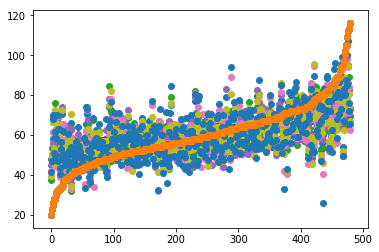

In [240]:
#model = AveragingModels(models = (gboost(), forest(30)))
#model = forest(30)
for model in [lasso, KRR, ENet, GBoost, model_lgb, model_xgb]:
    trained_model = train_model(model, X_train, Y_train)
    print(trained_model[0].score(X_test, Y_test))
    print(plot_clouds(trained_model[0], X_test, (Y_test)))


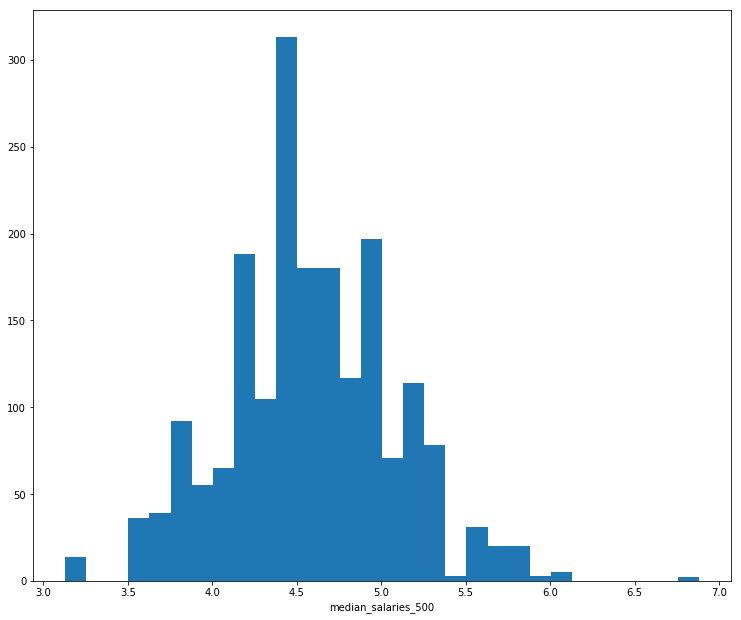

In [118]:
hist(X_train, 'median_salaries_500')

22.124655985612833

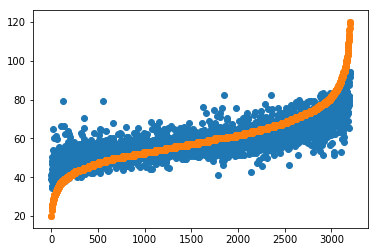

In [97]:
plot_clouds(trained_model[0], X, Y)

In [190]:
pred

array([160.24359783, 151.49606684, 154.58920094, 164.24604658,
       149.34723678, 182.32007838, 153.21383773, 149.73058092,
       160.28336272, 177.41419087, 150.27797841, 149.38288445,
       156.16413507, 155.59187327, 186.03481718, 148.42785719,
       146.14552105, 183.87322618, 163.18714004, 175.1764705 ,
       163.89221753, 160.19756008, 159.41941836, 145.7748013 ,
       163.38413925, 156.55469306, 183.06407457, 160.46635678,
       150.64338969, 161.23835517, 170.33337475, 149.26423131,
       155.7550251 , 164.3705514 , 155.59401804, 153.21013014,
       152.31518311, 163.30797105, 166.99431115, 153.23514497,
       155.62291243, 149.50479368, 145.76447838, 169.28867476,
       146.76689254, 152.04325468, 159.19026185, 148.20356329,
       153.04566847, 160.47517614, 157.61884834, 160.98942933,
       153.66363392, 155.84054492, 147.99410917, 157.33471973,
       168.22751907, 158.85889724, 166.26394518, 151.62410462,
       161.17782882, 152.17153925, 152.64016759, 147.45

In [563]:
avg.score(X_test, Y_test)

0.6320947982633465

mape: 37.17400086322414
mpe: -5.065595849178541,
rmsle: 36.453624559167885


(37.17400086322414, 36.453624559167885)

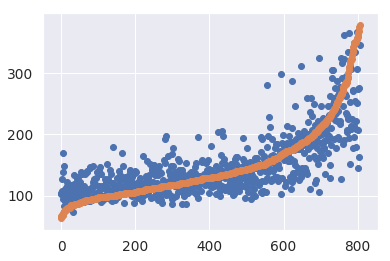

In [562]:
plot_clouds(avg, X_test, Y_test)

mape: 36.51693086580936
mpe: -3.4449328664399546,
rmsle: 37.3659517586584


(36.51693086580936, 37.3659517586584)

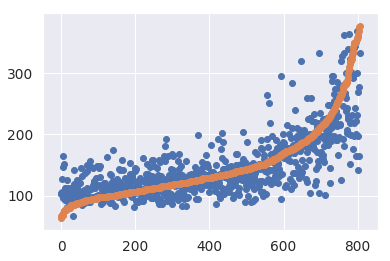

In [439]:
abbr = 'smr'
smr_data = pd.read_csv(f'./datasets/initial/{abbr}.csv')
smr_data = smr_data[smr_data['price_per_m'] <= 150]
smr_data = smr_data[smr_data['price_per_m'] >= 10]
smr_data['Id'] = [i for i in range(smr_data.shape[0])]

In [440]:
X = (smr_data[[c for c in smr_data.columns if c not in ['price', 'year', 'area', 'rooms', 'price_per_m']]])
Y = (smr_data['price_per_m'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [441]:
#save the ID column
train_ID = X_train['Id']
test_ID = X_test['Id']

#Drop the ID column since it is unnecessary for the prediction process
X_train.drop("Id", axis=1, inplace=True)
X_test.drop("Id", axis=1, inplace=True)


/home/disa/.local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Accuracy score:  0.8002851734047141
mape: 22.977194908946213
mpe: -4.236840162706854


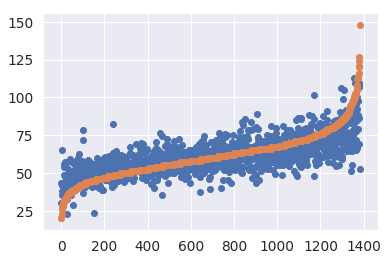

In [442]:
model = trained_gboost(X_train, Y_train)
plot_clouds(model, X_test, Y_test)

/home/disa/.local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Accuracy score:  0.8501359414312638


mape: 41.761233987169476
mpe: -11.848725154829744


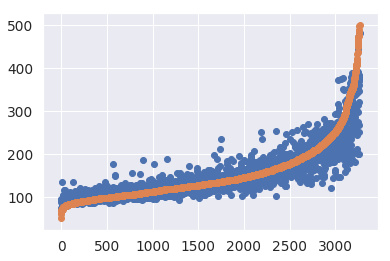

In [358]:
X_test.shape

(817, 46)

In [357]:
Y_test.shape

(817,)

In [310]:
#validation function
n_folds = 5

def RMSLE_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error",
cv = kf))
    return(rmse)


In [311]:
#lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

#Gradient Boosting Regression
GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000,
                                   min_samples_split=10, min_samples_leaf=15,max_depth=4,
                                   random_state=5,max_features='sqrt')



###### scores from the above models


In [312]:
#Lasso
score = RMSLE_cv(lasso)
print ("\n Lasso score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

#Gradient Boosting Regression
score = RMSLE_cv(GBoost)
print ("\n GBoost score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))


 Lasso score: 0.2967 (0.0068)


 GBoost score: 0.2293 (0.0107)




#### stacking the models 

###### averaging base model


In [ ]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


    
# Averaged base models score

averaged_models = AveragingModels(models = (GBoost, lasso))

score = RMSLE_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [314]:
#defining RMSLE evaluation function


In [ ]:
GBoost.fit(train.values, y_train) 


In [323]:
GBoost.score(train.values, y_train)

0.8904026035321058

In [332]:
#final training and prediction of the stacked regressor

averaged_models.fit(train.values, y_train) 
stacked_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))
print("RMSLE score on the train data:") 
print(RMSLE(y_train,stacked_train_pred))


TypeError: Cannot clone object 'array([DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x7f0ec1297d38>,
           splitter='best')], dtype=object)' (type <class 'numpy.ndarray'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

,id,SalePrice
688,599,150.030679
873,752,125.682289
3208,2775,116.767843
3388,2929,193.424050
2895,2513,135.738568


In [330]:
mape

16.652978226683445

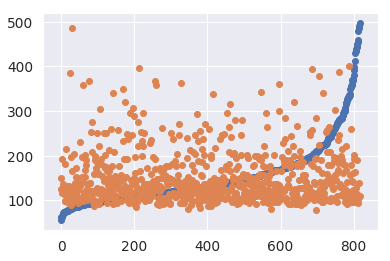

In [279]:
import matplotlib.pyplot as plt


(array([64., 75., 68., 67., 61., 57., 49., 50., 48., 34., 31., 32., 26.,
        12., 21., 20., 13., 10., 16.,  9.,  6.,  3.,  4.,  3.,  4.,  7.,
         3.,  1.,  5.,  3.,  3.,  2.,  2.,  1.,  0.,  0.,  1.,  1.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.]),
 array([1.58367296e-04, 2.14124863e-02, 4.26666053e-02, 6.39207243e-02,
        8.51748433e-02, 1.06428962e-01, 1.27683081e-01, 1.48937200e-01,
        1.70191319e-01, 1.91445438e-01, 2.12699557e-01, 2.33953676e-01,
        2.55207795e-01, 2.76461914e-01, 2.97716033e-01, 3.18970152e-01,
        3.40224271e-01, 3.61478390e-01, 3.82732509e-01, 4.03986628e-01,
        4.25240747e-01, 4.46494866e-01, 4.67748985e-01, 4.89003104e-01,
        5.10257223e-01, 5.31511342e-01, 5.52765461e-01, 5.74019580e-01,
        5.95273699e-01, 6.16527818e-01, 6.37781937e-01, 6.59036056e-01,
        6.80290175e-01, 7.01544294e-01, 7.22798413e-01, 7.44052532e-01,
        7.65306651e-01, 7.86560770e-01, 8.07814889e-01, 8.29069008e-

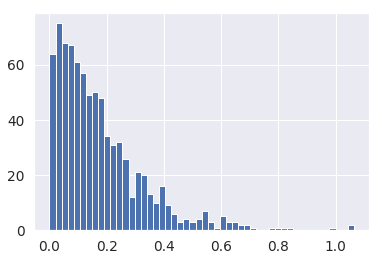

In [282]:
plt.hist(egg, 50)

NameError: name 'arange' is not defined